In [2]:
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

pd.set_option('display.float_format', lambda x: '%.2f' % x)
path = '../../../../k6/results/ssrh/20000/'

def convert_to_MiB(value):
    if 'GiB' in value:
        return str(int(float(value.replace('GiB', '')) * 1024))
    if 'MiB' in value:
        return value.replace('MiB', '')
    if 'B' in value:
        return str(int(float(value.replace('B', '')) / 1024))
    return value

def detect_outliers(df, features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(df[features])
    return outliers == 1

def graph_row(plot_func, datasets, height=3, width=20):
    cols = len(datasets)
    fig, axes = plt.subplots(ncols=cols, figsize=(width, height))
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)
    for x, (name, dataset) in enumerate(datasets.items()):
        plot_func(dataset, axes[x], idx=x)
        axes[x].set_title(name)
    return plt

# services = ["monolith", "teasers", "recommendations", "cdn", "discovery"]

In [3]:
df = pd.read_csv(f'{path}metrics.csv', sep=',')

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']

df = df[df['timestamp'] >= 30].reset_index(drop=True)

df.head(10)


,timestamp,cdn_cpu_percent,discovery_cpu_percent,monolith_cpu_percent,recommendations_cpu_percent,teasers_cpu_percent,cdn_mem_percent,discovery_mem_percent,monolith_mem_percent,recommendations_mem_percent,...,duration_mean,duration_min,duration_max,duration_count,throughput_mean,throughput_min,throughput_max,throughput_count,err_mean,err_count
0,30,0.00,7.67,178.15,85.68,70.79,0.28,0.86,41.71,3.94,...,8.15,5.51,56.60,1666,333.20,332.00,334.00,1666.00,0.00,0.00
1,35,0.00,7.27,175.85,87.43,69.88,0.28,0.86,42.16,3.97,...,9.88,5.28,70.67,1668,332.80,330.00,335.00,1664.00,0.00,0.00
2,40,0.00,6.98,174.33,84.54,69.55,0.28,0.86,42.77,4.04,...,9.28,5.33,101.76,1666,334.00,332.00,336.00,1670.00,0.00,0.00
3,45,0.00,8.45,182.89,86.67,79.78,0.28,0.87,43.16,4.02,...,9.12,5.42,81.66,1666,333.20,333.00,334.00,1666.00,0.00,0.00
4,50,0.00,7.61,173.46,74.30,70.17,0.28,0.86,43.73,4.05,...,7.86,5.42,34.92,1668,333.40,333.00,334.00,1667.00,0.00,0.00
5,55,0.00,7.14,165.18,75.00,70.01,0.28,0.86,44.10,4.01,...,8.19,5.36,73.94,1666,333.40,333.00,334.00,1667.00,0.00,0.00
6,60,0.00,7.34,174.57,74.74,68.74,0.28,0.86,44.67,4.02,...,7.61,5.19,37.10,1667,333.20,328.00,338.00,1666.00,0.00,0.00
7,65,0.00,7.24,174.95,75.33,67.78,0.28,0.87,45.00,4.04,...,7.96,5.34,72.83,1667,333.40,333.00,334.00,1667.00,0.00,0.00
8,70,0.00,9.26,166.48,76.60,70.78,0.28,0.86,45.36,4.03,...,7.67,5.32,69.36,1666,333.40,333.00,334.00,1667.00,0.00,0.00
9,75,0.00,9.20,165.25,74.78,69.97,0.28,0.87,45.94,4.03,...,9.15,4.92,68.03,1667,333.20,319.00,348.00,1666.00,0.00,0.00


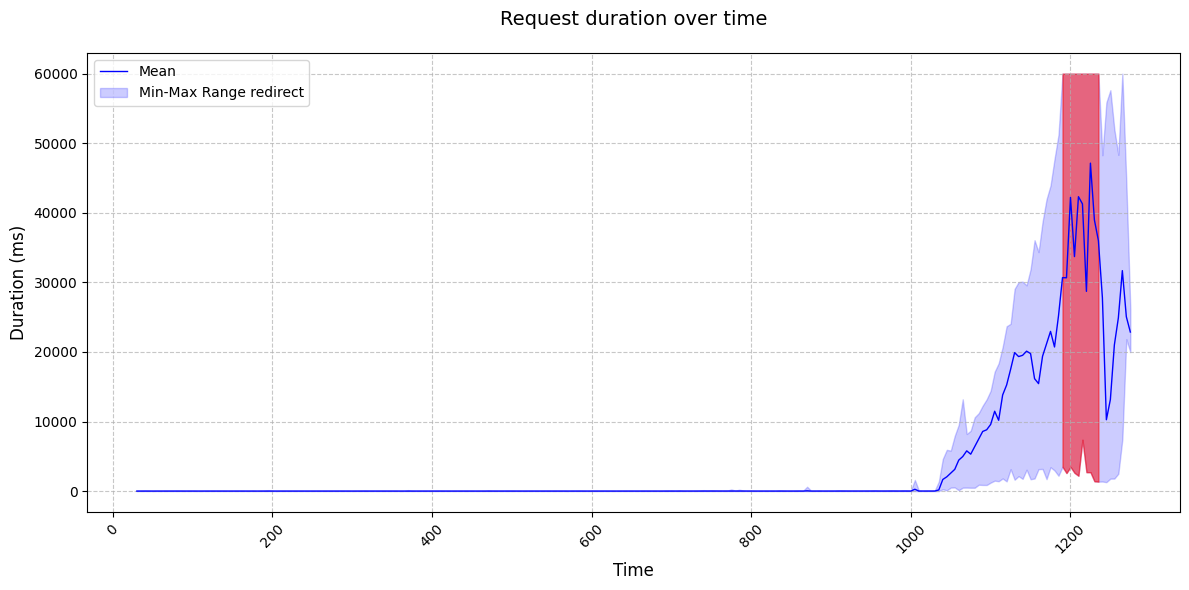

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['timestamp'], df['duration_mean'], 'b-', label='Mean', linewidth=1)

ax.fill_between(df['timestamp'], df['duration_min'], df['duration_max'], alpha=0.2, color='blue', label='Min-Max Range redirect')
ax.fill_between(df['timestamp'], df['duration_min'], df['duration_max'], where=(df['err_count'] > 1), color='red', alpha=0.5)

ax.set_title('Request duration over time', pad=20, size=14)
ax.set_xlabel('Time', size=12)
ax.set_ylabel('Duration (ms)', size=12)

ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

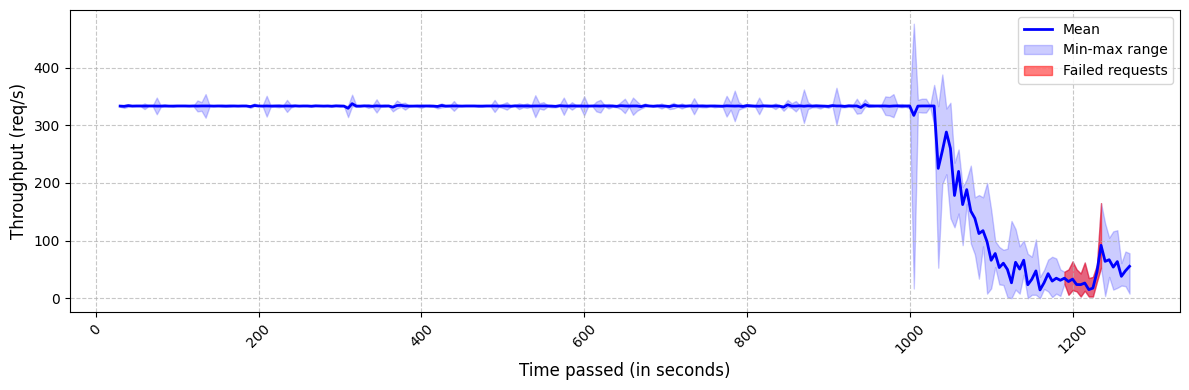

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df['timestamp'], df['throughput_mean'], 'b-', label='Mean', linewidth=2)

ax.fill_between(df['timestamp'], df['throughput_min'], df['throughput_max'], alpha=0.2, color='blue', label='Min-max range')
ax.fill_between(df['timestamp'], df['throughput_min'], df['throughput_max'], where=(df['err_count'] > 1), color='red', alpha=0.5, label='Failed requests')

ax.set_xlabel('Time passed (in seconds)', size=12)
ax.set_ylabel('Throughput (req/s)', size=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

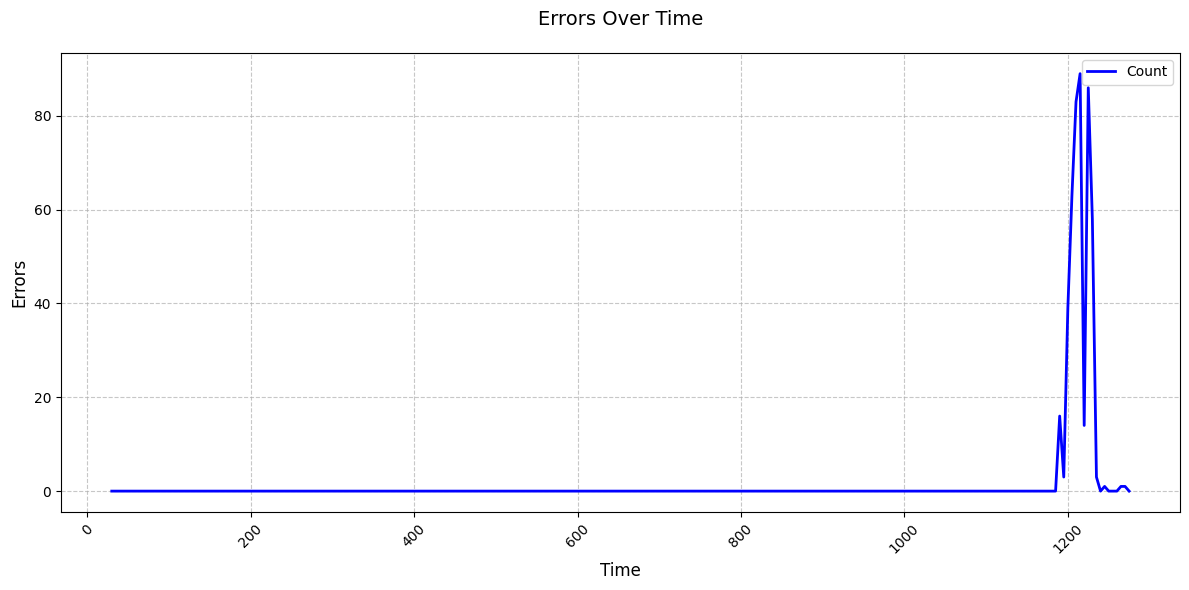

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['timestamp'], df['err_count'], 'b-', label='Count', linewidth=2)

ax.set_title('Errors Over Time', pad=20, size=14)
ax.set_xlabel('Time', size=12)
ax.set_ylabel('Errors', size=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()